<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/Macroeconomic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://fred.stlouisfed.org/series/DRCCLACBS - Delinquency rate on credit cards
# https://fred.stlouisfed.org/series/RCCCBBALDPD90P - Large bank consumer credit card balances: 90 days or more past due
# https://fred.stlouisfed.org/series/MORTGAGE30US - 30 year fixed mortgage average rate
# https://fred.stlouisfed.org/series/M2SL - M2 money supply
# https://fred.stlouisfed.org/series/RRPONTSYD - Reverse repos
# https://fred.stlouisfed.org/series/CPIAUCSL - CPI
# https://fred.stlouisfed.org/series/UNRATE - Unemployment
# https://fred.stlouisfed.org/series/WALCL - Total Assets
# https://fred.stlouisfed.org/series/T10Y3M - 10 year treasury constant maturity minus 3-moth treasury constatn maturity (bond yield)
#  - https://www.linkedin.com/pulse/understanding-significance-10-year-treasury-minus-3-month-julius-apat-zugzc/
# https://fred.stlouisfed.org/series/GFDEBTN - Federal debt
# https://fred.stlouisfed.org/series/GDP - GDP
# https://fred.stlouisfed.org/series/GDPC1 - Real GDP
# https://fred.stlouisfed.org/series/MSPUS - Median home price sales U.S
# https://fred.stlouisfed.org/series/CSUSHPINSA - Case schiller home price index
# https://fred.stlouisfed.org/series/T10YIE - 10 year inflation rate
# https://fred.stlouisfed.org/series/ASPUS - Average sales price of houses sold in U.S
# https://fred.stlouisfed.org/series/GFDEGDQ188S public debt as precent of GDP
# https://fred.stlouisfed.org/series/PCE - Personal consumption expenditures
# https://fred.stlouisfed.org/series/CIVPART - Labor force participation rate
# https://fred.stlouisfed.org/series/SP500 - S&P
# https://fred.stlouisfed.org/series/OPHNFB - Non-farm productivity
# https://fred.stlouisfed.org/series/CES0500000003 - Wages all employes 2006/2024
# https://fred.stlouisfed.org/series/AHETPI Wages all production and non-supervisory employees total private 65-2024

In [79]:
!pip install pymongo

import pandas as pd
from google.colab import userdata
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient, InsertOne
import seaborn as sns

In [151]:
productivity_df = pd.read_csv('/content/OPHNFB.csv', names=['Date', 'productivity'])
wages_df = pd.read_csv('/content/AHETPI.csv', names=['Date', 'average_wage'])
m2_money_df = pd.read_csv('/content/M2SL.csv', names=['Date', 'money_supply'])
cpi_df = pd.read_csv('/content/CPIAUCSL.csv', names=['Date', 'CPI_index'])
median_home_price_df = pd.read_csv('/content/MSPUS.csv', names=['Date', 'median_home_price'])
real_gdp_df = pd.read_csv('/content/GDPC1.csv', names=['Date', 'real_gdp'])
federal_public_debt_df = pd.read_csv('/content/GFDEBTN.csv', names=['Date', 'total_debt'])

In [152]:
productivity_df = productivity_df.iloc[1:]
wages_df = wages_df.iloc[1:]
m2_money_df = m2_money_df.iloc[1:]
cpi_df = cpi_df.iloc[1:]
median_home_price_df = median_home_price_df.iloc[1:]
real_gdp_df = real_gdp_df.iloc[1:]
federal_public_debt_df = federal_public_debt_df.iloc[1:]

In [153]:
# Convert the "Date" column to datetime format to ensure proper merging
# productivity_df['Date'] = pd.to_datetime(productivity_df['Date'])
# wages_df['Date'] = pd.to_datetime(wages_df['Date'])

# Perform an inner merge on the "Date" column
merged_df = pd.merge(productivity_df, wages_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, m2_money_df,on="Date", how="inner" )
merged_df = pd.merge(merged_df, cpi_df,on="Date", how="inner" )
merged_df = pd.merge(merged_df, median_home_price_df,on="Date", how="inner" )
merged_df = pd.merge(merged_df, real_gdp_df,on="Date", how="inner" )
merged_df = pd.merge(merged_df, federal_public_debt_df,on="Date", how="inner" )
# Print the merged dataframe to verify the merge
merged_df


,Date,productivity,average_wage,money_supply,CPI_index,median_home_price,real_gdp,total_debt
0,1966-01-01,38.845,2.68,462,31.88,21000,4731.888,320999
1,1966-04-01,38.576,2.71,469.3,32.28,22100,4748.046,316097
2,1966-07-01,38.703,2.74,470.9,32.45,21500,4788.254,324748
3,1966-10-01,38.943,2.77,475.7,32.85,21400,4827.537,329319
4,1967-01-01,39.251,2.80,481.6,32.9,22300,4870.299,330947
...,...,...,...,...,...,...,...,...
227,2022-10-01,109.252,28.00,21471.5,297.863,479500.0,21989.981,31419689.0
228,2023-01-01,109.095,28.31,21222.8,300.356,429000.0,22112.329,31458438.0
229,2023-04-01,109.938,28.68,20744.9,303.032,418500.0,22225.35,32332274.0
230,2023-07-01,111.206,29.03,20793.2,304.628,435400.0,22490.692,33167334.0


In [154]:
print(merged_df)

           Date productivity average_wage money_supply CPI_index  \
0    1966-01-01       38.845         2.68          462     31.88   
1    1966-04-01       38.576         2.71        469.3     32.28   
2    1966-07-01       38.703         2.74        470.9     32.45   
3    1966-10-01       38.943         2.77        475.7     32.85   
4    1967-01-01       39.251         2.80        481.6      32.9   
..          ...          ...          ...          ...       ...   
227  2022-10-01      109.252        28.00      21471.5   297.863   
228  2023-01-01      109.095        28.31      21222.8   300.356   
229  2023-04-01      109.938        28.68      20744.9   303.032   
230  2023-07-01      111.206        29.03      20793.2   304.628   
231  2023-10-01      112.086        29.29      20691.7   307.531   

    median_home_price   real_gdp  total_debt  
0               21000   4731.888      320999  
1               22100   4748.046      316097  
2               21500   4788.254      3247

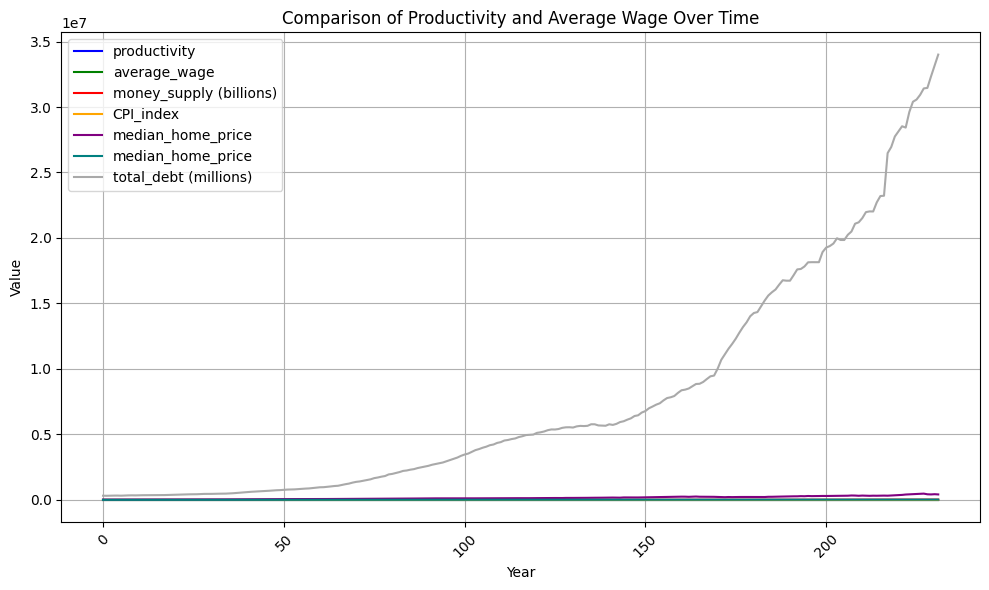

In [155]:
# Assuming you have the merged dataframe stored in merged_df

# # Convert the 'Date' column to datetime format
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the 'Date' column as the index
# merged_df.set_index('Date', inplace=True)

# Convert 'Productivity' and 'Average Wage' columns to numeric type
merged_df['productivity'] = pd.to_numeric(merged_df['productivity'])
merged_df['average_wage'] = pd.to_numeric(merged_df['average_wage'])
merged_df['money_supply'] = pd.to_numeric(merged_df['money_supply'])
merged_df['CPI_index'] = pd.to_numeric(merged_df['CPI_index'])
merged_df['median_home_price'] = pd.to_numeric(merged_df['median_home_price'])
merged_df['real_gdp'] = pd.to_numeric(merged_df['real_gdp'])
merged_df['total_debt'] = pd.to_numeric(merged_df['total_debt'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['productivity'], label='productivity', color='blue')
plt.plot(merged_df.index, merged_df['average_wage'], label='average_wage', color='green')
plt.plot(merged_df.index, merged_df['money_supply'], label='money_supply (billions)', color='red')
plt.plot(merged_df.index, merged_df['CPI_index'], label='CPI_index', color='orange')
plt.plot(merged_df.index, merged_df['median_home_price'], label='median_home_price', color='purple')
plt.plot(merged_df.index, merged_df['real_gdp'], label='median_home_price', color='teal')
plt.plot(merged_df.index, merged_df['total_debt'], label='total_debt (millions)', color='darkgray')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Productivity and Average Wage Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [156]:
print(merged_df)

           Date  productivity  average_wage  money_supply  CPI_index  \
0    1966-01-01        38.845          2.68         462.0     31.880   
1    1966-04-01        38.576          2.71         469.3     32.280   
2    1966-07-01        38.703          2.74         470.9     32.450   
3    1966-10-01        38.943          2.77         475.7     32.850   
4    1967-01-01        39.251          2.80         481.6     32.900   
..          ...           ...           ...           ...        ...   
227  2022-10-01       109.252         28.00       21471.5    297.863   
228  2023-01-01       109.095         28.31       21222.8    300.356   
229  2023-04-01       109.938         28.68       20744.9    303.032   
230  2023-07-01       111.206         29.03       20793.2    304.628   
231  2023-10-01       112.086         29.29       20691.7    307.531   

     median_home_price   real_gdp  total_debt  
0              21000.0   4731.888    320999.0  
1              22100.0   4748.046    31

In [157]:
correlation = merged_df[['money_supply', 'productivity', 'average_wage', 'CPI_index', 'median_home_price', 'real_gdp', 'total_debt']].corr()
correlation

,money_supply,productivity,average_wage,CPI_index,median_home_price,real_gdp,total_debt
money_supply,1.000000,0.939446,0.952498,0.910514,0.970970,0.928187,0.994933
productivity,0.939446,1.000000,0.990611,0.980493,0.976415,0.993077,0.934408
average_wage,0.952498,0.990611,1.000000,0.992053,0.987784,0.992439,0.944799
CPI_index,0.910514,0.980493,0.992053,1.000000,0.971392,0.990703,0.901143
median_home_price,0.970970,0.976415,0.987784,0.971392,1.000000,0.981027,0.958744
real_gdp,0.928187,0.993077,0.992439,0.990703,0.981027,1.000000,0.919915
total_debt,0.994933,0.934408,0.944799,0.901143,0.958744,0.919915,1.000000


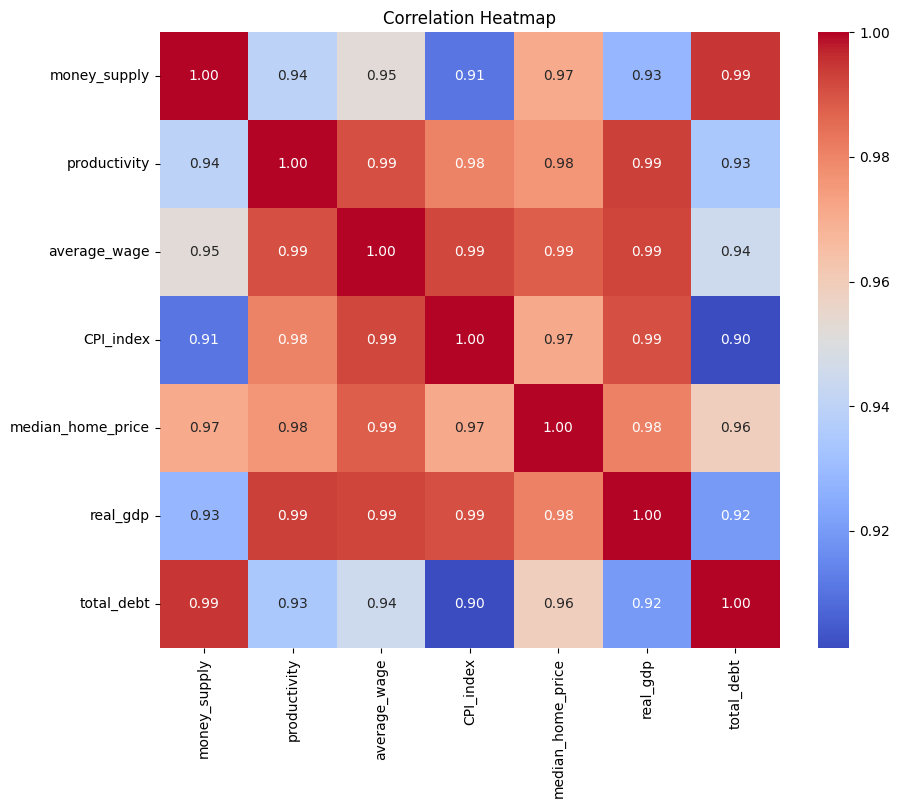

In [158]:
# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Using Season Decomoposition to analyze trends in the data

This method is for:
- In use in statistics to break down a time series into three components
    - trend
    - seasonality
    - residual

Terms:
 - Level: The average value in the series.
 - Trend: The increasing or decreasing value in the series.
 - Seasonality: The repeating short-term cycle in the series.
 - Noise: The random variation in the series.


This can be useful for:
- highlighting key dates or anomalies


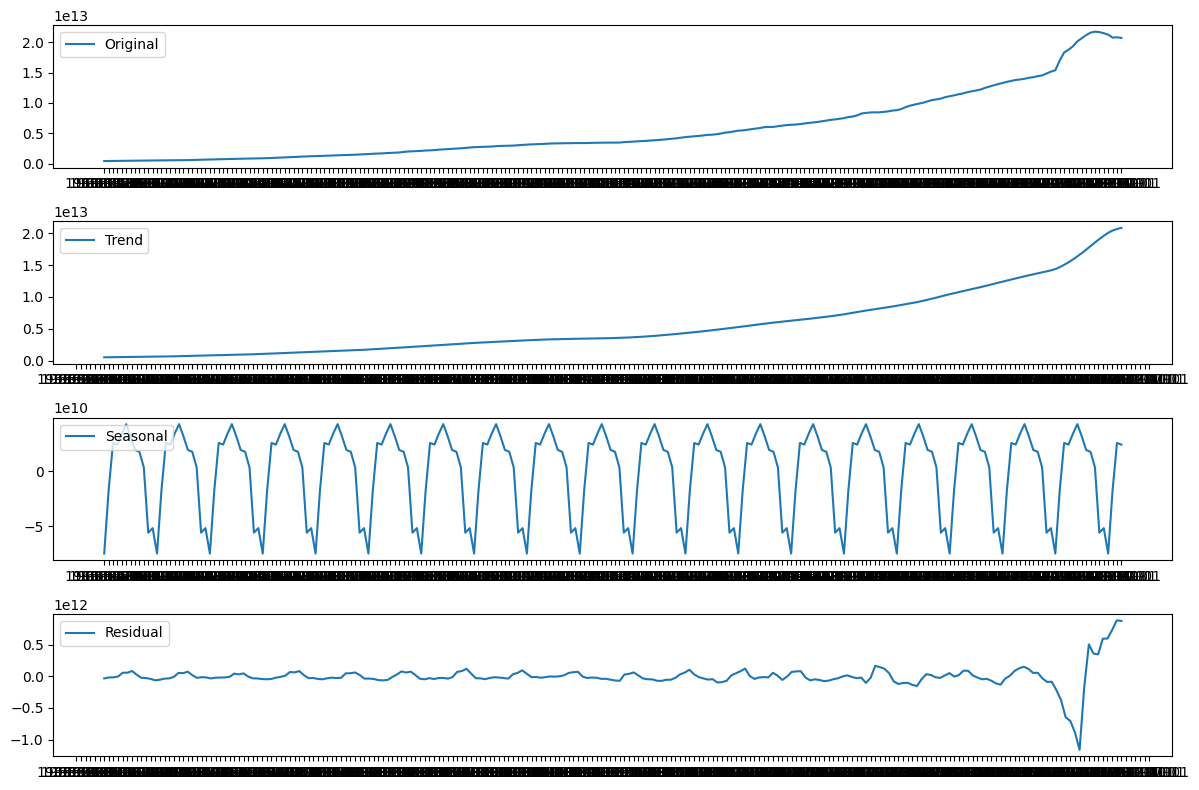

Dates with anomalies:
            productivity  average_wage  money_supply  CPI_index  \
Date                                                              
2020-04-01       111.129         25.14  1.698390e+13    256.126   
2020-07-01       111.941         24.69  1.829330e+13    258.408   
2020-10-01       110.821         24.85  1.874350e+13    260.249   
2021-01-01       111.466         25.17  1.932350e+13    262.518   
2021-04-01       111.386         25.51  2.012560e+13    266.752   
2021-07-01       110.701         25.96  2.062530e+13    271.994   
2021-10-01       111.378         26.46  2.114620e+13    276.434   
2022-01-01       109.814         26.90  2.155880e+13    282.390   
2022-04-01       108.688         27.27  2.172230e+13    288.764   
2022-07-01       108.681         27.66  2.164290e+13    294.977   
2022-10-01       109.252         28.00  2.147150e+13    297.863   
2023-01-01       109.095         28.31  2.122280e+13    300.356   
2023-04-01       109.938         28.68  

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have the merged dataframe stored in merged_df

# Convert 'Date' column to datetime format and set it as the index
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])
# merged_df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(merged_df['money_supply'], model='additive', period=12)  # Assuming seasonal period is 12 months

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(merged_df['money_supply'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Detect anomalies using z-score
mean = merged_df['money_supply'].mean()
std = merged_df['money_supply'].std()
threshold = 2  # Adjust threshold as needed
anomalies = merged_df[(merged_df['money_supply'] - mean).abs() > threshold * std]

# Print dates with anomalies
print("Dates with anomalies:")
print(anomalies)


In [149]:
anomalies

,productivity,average_wage,money_supply,CPI_index,median_home_price,real_gdp,total_debt,inflation_rate
Date,,,,,,,,
2020-04-01,111.129,25.14,16983.9,256.126,322600.0,19034.830,26477241.0,-1.073749
2020-07-01,111.941,24.69,18293.3,258.408,337500.0,20511.785,26945391.0,0.890968
2020-10-01,110.821,24.85,18743.5,260.249,358700.0,20724.128,27747798.0,0.712439
2021-01-01,111.466,25.17,19323.5,262.518,369800.0,20990.541,28132570.0,0.871857
2021-04-01,111.386,25.51,20125.6,266.752,382600.0,21309.544,28529436.0,1.612842
2021-07-01,110.701,25.96,20625.3,271.994,411200.0,21483.083,28428919.0,1.965121
2021-10-01,111.378,26.46,21146.2,276.434,423600.0,21847.602,29617215.0,1.632389
2022-01-01,109.814,26.90,21558.8,282.390,433100.0,21738.871,30400960.0,2.154583
2022-04-01,108.688,27.27,21722.3,288.764,449300.0,21708.160,30568582.0,2.257162


In [161]:
import pandas as pd

def calculate_inflation_rate(df, cpi_col='CPI_index'):
  """
  This function calculates the annual inflation rate from a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      cpi_col (str, optional): The column name containing the CPI index. Defaults to 'CPI_index'.

  Returns:
      pandas.DataFrame: The original DataFrame with a new 'inflation_rate' column.
  """
  df['previous_cpi'] = df[cpi_col].shift(1)
  df['inflation_rate'] = ((df[cpi_col] - df['previous_cpi']) / df['previous_cpi']) * 100
  return df

def detect_anomalies(df, column, threshold, std):
  """
  This function detects anomalies in a DataFrame column.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      column (str): The column name to analyze.
      threshold (float): The threshold multiplier for standard deviation.
      std (float): The standard deviation of the column.

  Returns:
      pandas.DataFrame: A new DataFrame containing only the rows identified as anomalies.
  """
  mean = df[column].mean()
  anomalies = df[(df[column] - mean).abs() > threshold * std]
  return anomalies

# Add inflation rate to DataFrame
merged_df = calculate_inflation_rate(merged_df.copy())  # Copy to avoid modifying original data

# Define thresholds and standard deviations for anomaly detection (adjust as needed)
money_supply_threshold = 2  # Multiplier for standard deviation
inflation_rate_threshold = 1.5  # Multiplier for standard deviation

money_supply_std = merged_df['money_supply'].std()
inflation_rate_std = merged_df['inflation_rate'].std()

# Detect anomalies in money supply and inflation rate
money_supply_anomalies = detect_anomalies(merged_df.copy(), 'money_supply', money_supply_threshold, money_supply_std)
inflation_rate_anomalies = detect_anomalies(merged_df.copy(), 'inflation_rate', inflation_rate_threshold, inflation_rate_std)

# Identify potential money supply - CPI increase link
potential_links = merged_df.merge(money_supply_anomalies, on='Date', how='inner')
potential_links = potential_links.merge(inflation_rate_anomalies, on='Date', how='inner')

# Explore the 'potential_links' DataFrame to find dates of interest
print(potential_links)


            productivity_x  average_wage_x  money_supply_x  CPI_index_x  \
Date                                                                      
2020-04-01         111.129           25.14    1.698390e+13      256.126   
2022-04-01         108.688           27.27    2.172230e+13      288.764   

            median_home_price_x  real_gdp_x  total_debt_x  previous_cpi_x  \
Date                                                                        
2020-04-01             322600.0    19034.83    26477241.0         258.906   
2022-04-01             449300.0    21708.16    30568582.0         282.390   

            inflation_rate_x  productivity_y  ...  inflation_rate_y  \
Date                                          ...                     
2020-04-01         -1.073749         111.129  ...         -1.073749   
2022-04-01          2.257162         108.688  ...          2.257162   

            productivity  average_wage  money_supply  CPI_index  \
Date                                  

In [162]:
potential_links

,productivity_x,average_wage_x,money_supply_x,CPI_index_x,median_home_price_x,real_gdp_x,total_debt_x,previous_cpi_x,inflation_rate_x,productivity_y,...,inflation_rate_y,productivity,average_wage,money_supply,CPI_index,median_home_price,real_gdp,total_debt,previous_cpi,inflation_rate
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,111.129,25.14,1.698390e+13,256.126,322600.0,19034.83,26477241.0,258.906,-1.073749,111.129,...,-1.073749,111.129,25.14,1.698390e+13,256.126,322600.0,19034.83,26477241.0,258.906,-1.073749
2022-04-01,108.688,27.27,2.172230e+13,288.764,449300.0,21708.16,30568582.0,282.390,2.257162,108.688,...,2.257162,108.688,27.27,2.172230e+13,288.764,449300.0,21708.16,30568582.0,282.390,2.257162


In [164]:
merged_df

,productivity,average_wage,money_supply,CPI_index,median_home_price,real_gdp,total_debt,previous_cpi,inflation_rate
Date,,,,,,,,,
1966-01-01,38.845,2.68,4.620000e+11,31.880,21000.0,4731.888,320999.0,NaN,NaN
1966-04-01,38.576,2.71,4.693000e+11,32.280,22100.0,4748.046,316097.0,31.880,1.254705
1966-07-01,38.703,2.74,4.709000e+11,32.450,21500.0,4788.254,324748.0,32.280,0.526642
1966-10-01,38.943,2.77,4.757000e+11,32.850,21400.0,4827.537,329319.0,32.450,1.232666
1967-01-01,39.251,2.80,4.816000e+11,32.900,22300.0,4870.299,330947.0,32.850,0.152207
...,...,...,...,...,...,...,...,...,...
2022-10-01,109.252,28.00,2.147150e+13,297.863,479500.0,21989.981,31419689.0,294.977,0.978381
2023-01-01,109.095,28.31,2.122280e+13,300.356,429000.0,22112.329,31458438.0,297.863,0.836962
2023-04-01,109.938,28.68,2.074490e+13,303.032,418500.0,22225.350,32332274.0,300.356,0.890943


## Time Series & Causal Analysis

### Trend analysis from seasonal_decompose
- Additive model
- granger causality test
  - Statistical hypothesis test for determining whether one time serieis is useful in forecasting another, in this case if money_supply is predictive of other metrics like CPI_index going up, or wages subsequently going up to meet that inflation. vice/versa


---
#### Results in this case:

Granger Causality Test Results:
```
{'productivity': 0.026085578740146897, 'average_wage': 0.647102314448139, 'CPI_index': 0.9425616044797247, 'median_home_price': 0.02477497508610724}
```



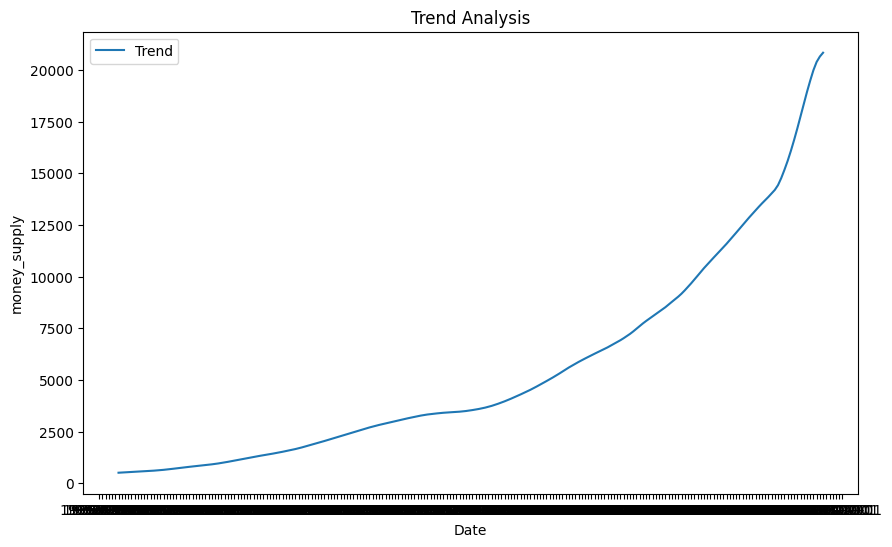

Granger Causality Test Results:
{'productivity': 0.026085578740146897, 'average_wage': 0.647102314448139, 'CPI_index': 0.9425616044797247, 'median_home_price': 0.02477497508610724}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [140]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests


# Time Series Analysis
# Trend Analysis
def plot_trend(data, column):
    decomposition = seasonal_decompose(data[column], model='additive', period=12)
    trend = decomposition.trend
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], trend, label='Trend')
    plt.title('Trend Analysis')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()

plot_trend(merged_df, 'money_supply')

# Causal Analysis
# Granger Causality Test
def granger_causality_test(data, variables, max_lag):
    results = {}
    for var in variables:
        result = grangercausalitytests(data[['money_supply', var]], max_lag, verbose=False)
        results[var] = result[1][0]['ssr_ftest'][1]  # p-value
    return results

causality_results = granger_causality_test(merged_df, ['productivity', 'average_wage', 'CPI_index', 'median_home_price'], max_lag=4)
print("Granger Causality Test Results:")
print(causality_results)


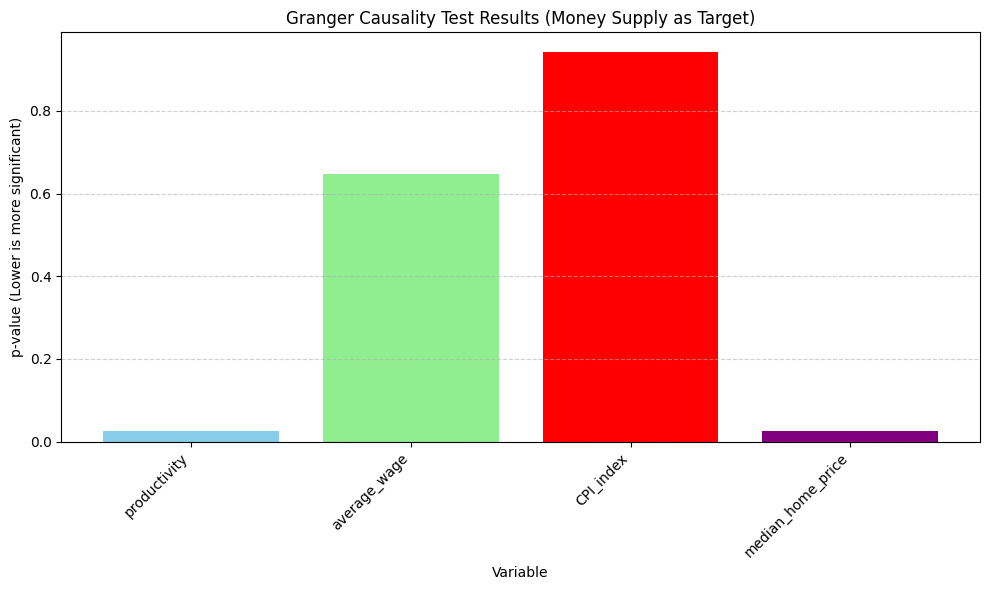

In [148]:
# Extract variable names and p-values
variable_names = list(causality_results.keys())
p_values = list(causality_results.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(variable_names, p_values, color=['skyblue', 'lightgreen', 'red', 'purple'])
plt.xlabel('Variable')
plt.ylabel('p-value (Lower is more significant)')
plt.title('Granger Causality Test Results (Money Supply as Target)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint grid lines

plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

### Autocorrelation matrix

Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags.

Characteristics Of Autocorrelation Plot :

It measures a set of current values against a set of past values and finds whether they correlate.
It is the correlation of one-time series data to another time series data which has a time lag.
It varies from +1 to -1.
An autocorrelation of +1 indicates that if time series one increases in value the time series 2 also increases in proportion to the change in time series 1.
An autocorrelation of -1 indicates that if time series one increases in value the time series 2 decreases in proportion to the change in time series 1.

---

### Stationary test:
Determing "anti-seasonality". Seasonality was found as money supply expansion appears to be rather cyclical



#### Stationary Time Series



The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

---


### Regression analysis using statsmodel linear regression
- has high R2 in this case

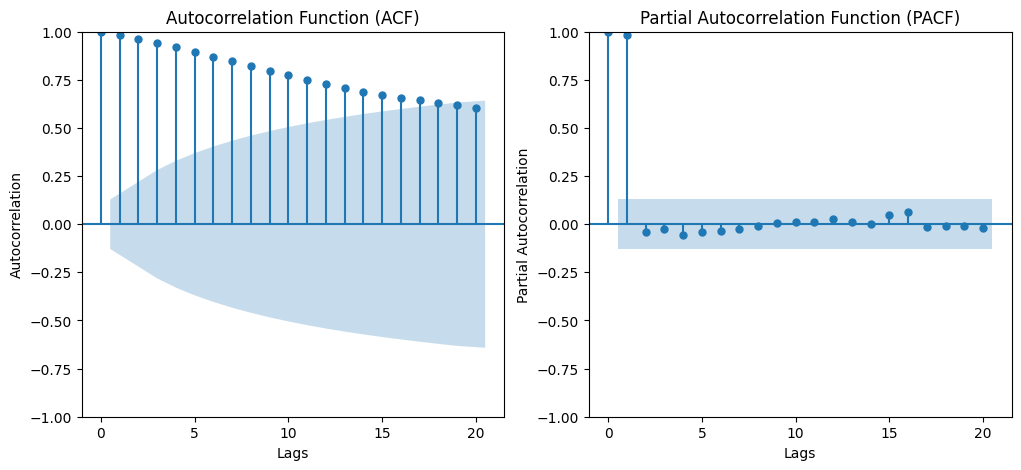

Augmented Dickey-Fuller Test:
ADF Statistic: 5.138134262327063
p-value: 1.0
Critical Values:
  1%: -3.460849270544952
  5%: -2.87495318813585
  10%: -2.5739190539191745
                            OLS Regression Results                            
Dep. Variable:           money_supply   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6724.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.89e-234
Time:                        21:29:26   Log-Likelihood:                -1771.7
No. Observations:                 232   AIC:                             3553.
Df Residuals:                     227   BIC:                             3571.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err  

In [141]:
import numpy as np

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Autocorrelation Analysis
def autocorrelation_analysis(data, column):
  # Compute autocorrelation function (ACF)
  acf_result = acf(data[column], nlags=20)
  pacf_result = pacf(data[column], nlags=20)

  # Plot ACF and PACF
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plot_acf(data[column], ax=plt.gca(), lags=20)
  plt.xlabel('Lags')  # Added label for x-axis
  plt.ylabel('Autocorrelation')  # Added label for y-axis
  plt.title('Autocorrelation Function (ACF)')
  plt.subplot(1, 2, 2)
  plot_pacf(data[column], ax=plt.gca(), lags=20)
  plt.xlabel('Lags')  # Added label for x-axis
  plt.ylabel('Partial Autocorrelation')  # Added label for y-axis
  plt.title('Partial Autocorrelation Function (PACF)')
  plt.show()

autocorrelation_analysis(merged_df, 'money_supply')

# Stationarity Testing
def stationarity_test(data, column):
    result = adfuller(data[column])
    print('Augmented Dickey-Fuller Test:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

stationarity_test(merged_df, 'money_supply')

# Regression Analysis
def regression_analysis(data, target, features):
    X = data[features]
    X = sm.add_constant(X)  # Add constant term
    y = data[target]

    model = OLS(y, X)
    results = model.fit()

    print(results.summary())

# Define features and target for regression analysis
target_variable = 'money_supply'
feature_variables = ['productivity', 'average_wage', 'CPI_index', 'median_home_price']

# Perform regression analysis
regression_analysis(merged_df, target_variable, feature_variables)



In [144]:
def calculate_inflation_rate(df, cpi_col='CPI_index'):
  """
  This function calculates the annual inflation rate from a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      cpi_col (str, optional): The column name containing the CPI index. Defaults to 'CPI_index'.

  Returns:
      pandas.Series: A new Series containing the annual inflation rate for each year.
  """
  df['previous_cpi'] = df[cpi_col].shift(1)
  df['inflation_rate'] = ((df[cpi_col] - df['previous_cpi']) / df['previous_cpi']) * 100
  return df['inflation_rate']

# Example usage
inflation_rate = calculate_inflation_rate(merged_df.copy())
inflation_rate.dropna(inplace=True)
inflation_rate

1      1.254705
2      0.526642
3      1.232666
4      0.152207
5      0.607903
         ...   
227    0.978381
228    0.836962
229    0.890943
230    0.526677
231    0.952966
Name: inflation_rate, Length: 231, dtype: float64

## Save the data in MongoDB

In [81]:
dict_data = merged_df.to_dict(orient="records")
dict_data

[{'Date': '1966-01-01',
  'productivity': 38.845,
  'average_wage': 2.68,
  'money_supply': 462.0,
  'CPI_index': 31.88,
  'median_home_price': 21000.0,
  'real_gdp': 4731.888,
  'total_debt': 320999.0},
 {'Date': '1966-04-01',
  'productivity': 38.576,
  'average_wage': 2.71,
  'money_supply': 469.3,
  'CPI_index': 32.28,
  'median_home_price': 22100.0,
  'real_gdp': 4748.046,
  'total_debt': 316097.0},
 {'Date': '1966-07-01',
  'productivity': 38.703,
  'average_wage': 2.74,
  'money_supply': 470.9,
  'CPI_index': 32.45,
  'median_home_price': 21500.0,
  'real_gdp': 4788.254,
  'total_debt': 324748.0},
 {'Date': '1966-10-01',
  'productivity': 38.943,
  'average_wage': 2.77,
  'money_supply': 475.7,
  'CPI_index': 32.85,
  'median_home_price': 21400.0,
  'real_gdp': 4827.537,
  'total_debt': 329319.0},
 {'Date': '1967-01-01',
  'productivity': 39.251,
  'average_wage': 2.8,
  'money_supply': 481.6,
  'CPI_index': 32.9,
  'median_home_price': 22300.0,
  'real_gdp': 4870.299,
  'total_

In [82]:
def add_data_to_mongodb(env_key_name, db_name, collection_name, data_to_insert):
  key = userdata.get(env_key_name)

  client = pymongo.MongoClient(key)
  db = client[db_name]
  collection = db[collection_name]

  try:
    results = collection.insert_many(data_to_insert)
    print(results, 'Result from adding records')
  except:
    print('Exception occurred with saving')

  client.close()


add_data_to_mongodb('mongodb_connection_string', 'MarketApp', 'macro_economic_metrics', dict_data)

InsertManyResult([ObjectId('662eb2e2b34c9b0bdb7c8c1c'), ObjectId('662eb2e2b34c9b0bdb7c8c1d'), ObjectId('662eb2e2b34c9b0bdb7c8c1e'), ObjectId('662eb2e2b34c9b0bdb7c8c1f'), ObjectId('662eb2e2b34c9b0bdb7c8c20'), ObjectId('662eb2e2b34c9b0bdb7c8c21'), ObjectId('662eb2e2b34c9b0bdb7c8c22'), ObjectId('662eb2e2b34c9b0bdb7c8c23'), ObjectId('662eb2e2b34c9b0bdb7c8c24'), ObjectId('662eb2e2b34c9b0bdb7c8c25'), ObjectId('662eb2e2b34c9b0bdb7c8c26'), ObjectId('662eb2e2b34c9b0bdb7c8c27'), ObjectId('662eb2e2b34c9b0bdb7c8c28'), ObjectId('662eb2e2b34c9b0bdb7c8c29'), ObjectId('662eb2e2b34c9b0bdb7c8c2a'), ObjectId('662eb2e2b34c9b0bdb7c8c2b'), ObjectId('662eb2e2b34c9b0bdb7c8c2c'), ObjectId('662eb2e2b34c9b0bdb7c8c2d'), ObjectId('662eb2e2b34c9b0bdb7c8c2e'), ObjectId('662eb2e2b34c9b0bdb7c8c2f'), ObjectId('662eb2e2b34c9b0bdb7c8c30'), ObjectId('662eb2e2b34c9b0bdb7c8c31'), ObjectId('662eb2e2b34c9b0bdb7c8c32'), ObjectId('662eb2e2b34c9b0bdb7c8c33'), ObjectId('662eb2e2b34c9b0bdb7c8c34'), ObjectId('662eb2e2b34c9b0bdb7c8c